In [44]:
#do with standard
import config
import os
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [12]:
rc = pd.read_csv('data/RC.csv')

In [41]:
rc.describe()

,Date,Cost Index,Year Composite
count,129.000000,129.000000,129.000000
mean,1954.000000,65.515839,308.655323
std,37.383151,19.288464,568.733520
min,1890.000000,32.805185,4.233333
25%,1922.000000,49.420634,9.235000
50%,1954.000000,64.044606,29.689167
75%,1986.000000,82.794848,236.358333
max,2018.000000,100.568840,2744.680000


In [45]:
scaler=MinMaxScaler()
#fit scaler
scaler.fit(rc[['Cost Index', 'Year Composite']])
#transformed scaled data
rc_scaled=scaler.transform(rc[['Cost Index', 'Year Composite']])

#rever to dataframe
rc_scaled = pd.DataFrame(rc_scaled, columns=['Cost Index', 'Year Composite'])
rc_scaled['Date']=rc.Date
rc_scaled.head()

,Cost Index,Year Composite,Date
0,0.861429,1.000000,2018
1,0.846391,0.891820,2017
2,0.836152,0.761778,2016
3,0.824170,0.750595,2015
4,0.791969,0.702964,2014


## Pearson

In [46]:
rc.corr()

,Date,Cost Index,Year Composite
Date,1.000000,0.823195,0.720420
Cost Index,0.823195,1.000000,0.508174
Year Composite,0.720420,0.508174,1.000000


In [85]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
df = rc_scaled
overall_pearson_r = df.corr().iloc[1,2]
print(f"Pandas computed Pearson r: {overall_pearson_r}")
# out: Pandas computed Pearson r: 0.2058774513561943

Pandas computed Pearson r: 0.7204202996733304


In [86]:
r, p = stats.pearsonr(df.dropna()['Cost Index'], df.dropna()['Year Composite'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")
# out: Scipy computed Pearson r: 0.20587745135619354 and p-value: 3.7902989479463397e-51

Scipy computed Pearson r: 0.5081742916268339 and p-value: 7.864393084155875e-10


In [87]:
df1 = df.drop(['Date'], axis=1)

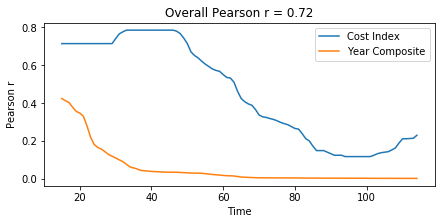

In [88]:
# Compute rolling window synchrony
f,ax=plt.subplots(figsize=(7,3))
df1.rolling(window=30,center=True).median().plot(ax=ax)
ax.set(xlabel='Time',ylabel='Pearson r')
ax.set(title=f"Overall Pearson r = {np.round(overall_pearson_r,2)}");

Text(0.5, 0.98, 'Smiling data and rolling window correlation')

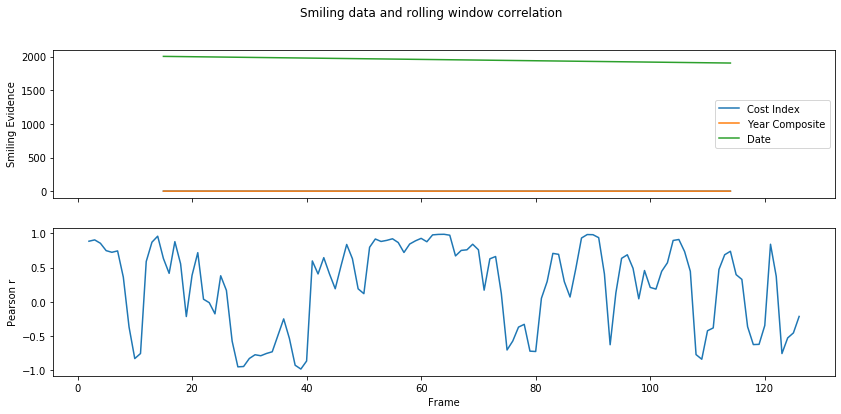

In [89]:
# Set window size to compute moving window synchrony.
r_window_size = 5
# Interpolate missing data.
df_interpolated = df.interpolate()
# Compute rolling window synchrony
rolling_r = df_interpolated['Cost Index'].rolling(window=r_window_size, center=True).corr(df_interpolated['Year Composite'])
f,ax=plt.subplots(2,1,figsize=(14,6),sharex=True)
df.rolling(window=30,center=True).median().plot(ax=ax[0])
ax[0].set(xlabel='Frame',ylabel='Smiling Evidence')
rolling_r.plot(ax=ax[1])
ax[1].set(xlabel='Frame',ylabel='Pearson r')
plt.suptitle("Smiling data and rolling window correlation")

In [92]:
df.corr(method='spearman')  # Spearman's rho

,Cost Index,Year Composite,Date
Cost Index,1.000000,0.792213,0.806887
Year Composite,0.792213,1.000000,0.978052
Date,0.806887,0.978052,1.000000


In [93]:
df.corr(method='kendall')   # Kendall's tau


,Cost Index,Year Composite,Date
Cost Index,1.000000,0.571221,0.592054
Year Composite,0.571221,1.000000,0.893411
Date,0.592054,0.893411,1.000000
